In [1]:
# for manipulations
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as RMSE

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactivity
import ipywidgets
from ipywidgets import interact

import os
for dirname, _, filenames in os.walk('/1kodikon'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv("Crop_recommendation.csv")
print(data.shape)
data.head()

(2200, 8)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Description for each of the columns in the Dataset

N - ratio of Nitrogen content in soil
P - ratio of Phosphorous content in soil
K - ration of Potassium content in soil
temperature - temperature in degree Celsius
humidity - relative humidity in %
ph - ph value of the soil
rainfall - rainfall in mm

In [3]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

#Dwscriptive stats:

In [ ]:
print("Average Ratio of Nitrogen in the Soil : {0:.2f}".format(data['N'].mean()))
print("Average Ratio of Phosphorous in the Soil : {0:.2f}".format(data['P'].mean()))
print("Average Ratio of Potassium in the Soil : {0:.2f}".format(data['K'].mean()))
print("Average Tempature in Celsius : {0:.2f}".format(data['temperature'].mean()))
print("Average Relative Humidity in % : {0:.2f}".format(data['humidity'].mean()))
print("Average PH Value of the soil : {0:.2f}".format(data['ph'].mean()))
print("Average Rainfall in mm : {0:.2f}".format(data['rainfall'].mean()))

In [4]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [5]:
@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print("---------------------------------------------")
    print("Nitrogen-")
    print("Minimum:", x['N'].min())
    print("Average:", x['N'].mean())
    print("Maximum:", x['N'].max()) 
    print("---------------------------------------------")
    print("Phosphorous-")
    print("Minimum:", x['P'].min())
    print("Average:", x['P'].mean())
    print("Maximum:", x['P'].max()) 
    print("---------------------------------------------")
    print("Potassium-")
    print("Minimum:", x['K'].min())
    print("Average:", x['K'].mean())
    print("Maximum:", x['K'].max()) 
    print("---------------------------------------------")
    print("Temperature-")
    print("Minimum: {0:.2f}".format(x['temperature'].min()))
    print("Average: {0:.2f}".format(x['temperature'].mean()))
    print("Maximum: {0:.2f}".format(x['temperature'].max()))
    print("---------------------------------------------")
    print("Humidity-")
    print("Minimum: {0:.2f}".format(x['humidity'].min()))
    print("Average: {0:.2f}".format(x['humidity'].mean()))
    print("Maximum: {0:.2f}".format(x['humidity'].max()))
    print("---------------------------------------------")
    print("Statistics for PH-")
    print("Minimum: {0:.2f}".format(x['ph'].min()))
    print("Average: {0:.2f}".format(x['ph'].mean()))
    print("Maximum: {0:.2f}".format(x['ph'].max()))
    print("---------------------------------------------")
    print("Statistics for Rainfall-")
    print("Minimum: {0:.2f}".format(x['rainfall'].min()))
    print("Average: {0:.2f}".format(x['rainfall'].mean()))
    print("Maximum: {0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [6]:
## Lets compare the Average Requirement for each crops with average conditions

@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average Value for", conditions,"is {0:.2f}".format(data[conditions].mean()))
    print("----------------------------------------------")
    print("Rice : {0:.2f}".format(data[(data['label'] == 'rice')][conditions].mean()))
    print("Black Grams : {0:.2f}".format(data[data['label'] == 'blackgram'][conditions].mean()))
    print("Banana : {0:.2f}".format(data[(data['label'] == 'banana')][conditions].mean()))
    print("Jute : {0:.2f}".format(data[data['label'] == 'jute'][conditions].mean()))
    print("Coconut : {0:.2f}".format(data[(data['label'] == 'coconut')][conditions].mean()))
    print("Apple : {0:.2f}".format(data[data['label'] == 'apple'][conditions].mean()))
    print("Papaya : {0:.2f}".format(data[(data['label'] == 'papaya')][conditions].mean()))
    print("Muskmelon : {0:.2f}".format(data[data['label'] == 'muskmelon'][conditions].mean()))
    print("Grapes : {0:.2f}".format(data[(data['label'] == 'grapes')][conditions].mean()))
    print("Watermelon : {0:.2f}".format(data[data['label'] == 'watermelon'][conditions].mean()))
    print("Kidney Beans: {0:.2f}".format(data[(data['label'] == 'kidneybeans')][conditions].mean()))
    print("Mung Beans : {0:.2f}".format(data[data['label'] == 'mungbean'][conditions].mean()))
    print("Oranges : {0:.2f}".format(data[(data['label'] == 'orange')][conditions].mean()))
    print("Chick Peas : {0:.2f}".format(data[data['label'] == 'chickpea'][conditions].mean()))
    print("Lentils : {0:.2f}".format(data[(data['label'] == 'lentil')][conditions].mean()))
    print("Cotton : {0:.2f}".format(data[data['label'] == 'cotton'][conditions].mean()))
    print("Maize : {0:.2f}".format(data[(data['label'] == 'maize')][conditions].mean()))
    print("Moth Beans : {0:.2f}".format(data[data['label'] == 'mothbeans'][conditions].mean()))
    print("Pigeon Peas : {0:.2f}".format(data[(data['label'] == 'pigeonpeas')][conditions].mean()))
    print("Mango : {0:.2f}".format(data[data['label'] == 'mango'][conditions].mean()))
    print("Pomegranate : {0:.2f}".format(data[(data['label'] == 'pomegranate')][conditions].mean()))
    print("Coffee : {0:.2f}".format(data[data['label'] == 'coffee'][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [7]:
@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Crops which require greater than average", conditions,'\n')
    print(data[data[conditions] > data[conditions].mean()]['label'].unique())
    print("----------------------------------------------")
    print("Crops which require less than average", conditions,'\n')
    print(data[data[conditions] <= data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

### Analyzing Agricultural Conditions

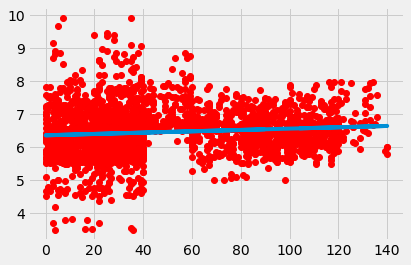

In [9]:
x=data['N'].tolist()
y=data['ph'].tolist()
plt.plot(x, y, 'ro')
b1,b0=np.polyfit(x,y,deg=1)
yp=b0+b1*np.array(data['N'])
plt.plot(x,yp)
plt.show()

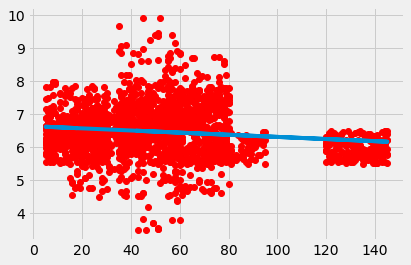

In [10]:
x=data['P'].tolist()
y=data['ph'].tolist()
plt.plot(x, y, 'ro')
b1,b0=np.polyfit(x,y,deg=1)
yp=b0+b1*np.array(data['P'])
plt.plot(x,yp)
plt.show()

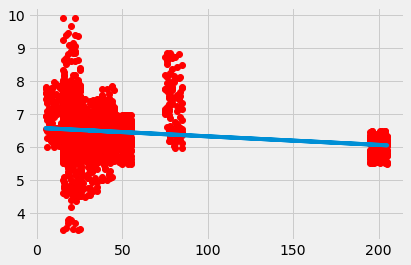

In [11]:
x=data['K'].tolist()
y=data['ph'].tolist()
plt.plot(x, y, 'ro')
b1,b0=np.polyfit(x,y,deg=1)
yp=b0+b1*np.array(data['K'])
plt.plot(x,yp)
plt.show()

Text(0, 0.5, 'Probabilty')

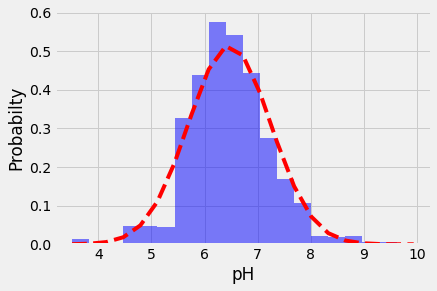

In [12]:
x = data['ph'].tolist()

n, bins, patches = plt.hist(x, 20, density = 1, facecolor = 'blue', alpha = 0.5)

y=st.norm.pdf(bins,data['ph'].mean(),data['ph'].std())

plt.plot(bins,y,'r--')
plt.xlabel('pH')
plt.ylabel('Probabilty')

C:\Users\anshh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anshh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anshh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

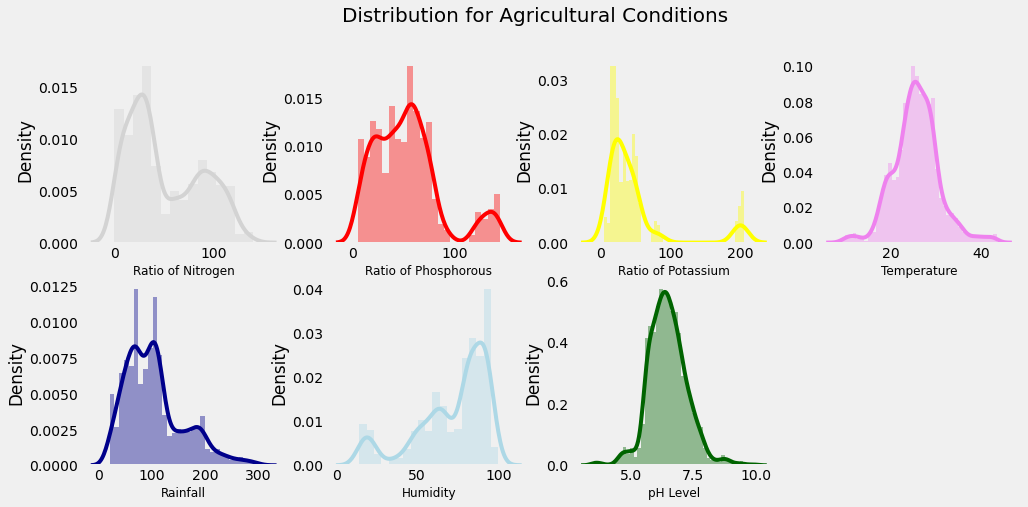

In [13]:
#distribution of Agricultural Conditions :

plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(2, 4, 1)
sns.distplot(data['N'], color = 'lightgrey')
plt.xlabel('Ratio of Nitrogen', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 2)
sns.distplot(data['P'], color = 'red')
plt.xlabel('Ratio of Phosphorous', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(data['K'], color ='yellow')
plt.xlabel('Ratio of Potassium', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(data['temperature'], color = 'violet')
plt.xlabel('Temperature', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(data['rainfall'], color = 'darkblue')
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 6)
sns.distplot(data['humidity'], color = 'lightblue')
plt.xlabel('Humidity', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 7)
sns.distplot(data['ph'], color = 'darkgreen')
plt.xlabel('pH Level', fontsize = 12)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize = 20)
plt.show()


In [14]:
print("Crops - High Ratio of Nitrogen Content in Soil:", data[data['N'] > 120]['label'].unique())
print("Crops - High Ratio of Phosphorous Content in Soil:", data[data['P'] > 100]['label'].unique())
print("Crops - High Ratio of Potassium Content in Soil:", data[data['K'] > 200]['label'].unique())
print("Crops - High Rainfall:", data[data['rainfall'] > 200]['label'].unique())
print("Crops - Low Temperature :", data[data['temperature'] < 10]['label'].unique())
print("Crops - High Temperature :", data[data['temperature'] > 40]['label'].unique())
print("Crops - Low Humidity:", data[data['humidity'] < 20]['label'].unique())
print("Crops - Low pH:", data[data['ph'] < 4]['label'].unique())
print("Crops - High pH:", data[data['ph'] > 9]['label'].unique())

Crops - High Ratio of Nitrogen Content in Soil: ['cotton']
Crops - High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops - High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops - High Rainfall: ['rice' 'papaya' 'coconut']
Crops - Low Temperature : ['grapes']
Crops - High Temperature : ['grapes' 'papaya']
Crops - Low Humidity: ['chickpea' 'kidneybeans']
Crops - Low pH: ['mothbeans']
Crops - High pH: ['mothbeans']


In [17]:
print("Crops in Karnataka: ")
print("Summer Crops")
print(data[(data['temperature'] > 32) & (data['humidity'] > 62)]['label'].unique())
print("Winter Crops")
print(data[(data['temperature'] < 25) & (data['humidity'] > 30)]['label'].unique())
print("Monsoon Crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 50)]['label'].unique())

Crops in Karnataka: 
Summer Crops
['pigeonpeas' 'blackgram' 'grapes' 'orange' 'papaya']
Winter Crops
['rice' 'maize' 'pigeonpeas' 'mothbeans' 'lentil' 'pomegranate' 'grapes'
 'watermelon' 'apple' 'orange' 'papaya' 'cotton' 'jute' 'coffee']
Monsoon Crops
['rice' 'papaya' 'coconut']


In [18]:
x = data.loc[:, ['N','P','K','temperature','ph','humidity','rainfall']].values
print(x.shape)
x_data  = pd.DataFrame(x)
x_data.head()

(2200, 7)


,0,1,2,3,4,5,6
0,90.0,42.0,43.0,20.879744,6.502985,82.002744,202.935536
1,85.0,58.0,41.0,21.770462,7.038096,80.319644,226.655537
2,60.0,55.0,44.0,23.004459,7.840207,82.320763,263.964248
3,74.0,35.0,40.0,26.491096,6.980401,80.158363,242.864034
4,78.0,42.0,42.0,20.130175,7.628473,81.604873,262.717340


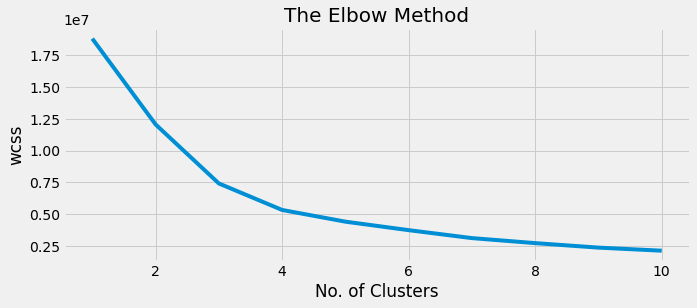

In [19]:
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (10, 4)

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()